In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
df=pd.read_csv('/content/car performance (1).csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## ***Data Pre-processing***

In [32]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [33]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [34]:
df['horsepower'].fillna((df['horsepower'].astype('float64').mean()),inplace=True)

In [35]:
df['horsepower'].isnull().sum()

0

In [36]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [37]:
df['horsepower']=df['horsepower'].astype('float64')
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [38]:
df.drop('car name',axis=1,inplace=True)

## ***Dependent and Independent variables***

In [39]:
X=df.iloc[:,1:8]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [40]:

y=df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## ***Designing Testing & Training Dataset***

In [41]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

## ***Linear Regression***

In [42]:
lr=LinearRegression()
log_reg=lr.fit(x_train,y_train)

In [43]:
y_pred1=lr.predict(x_test)
print(x_test)
y_pred1

     cylinders  displacement  horsepower  weight  acceleration  model year  \
65           8         351.0  153.000000    4129          13.0          72   
132          4         140.0   75.000000    2542          17.0          74   
74           8         302.0  140.000000    4294          16.0          72   
78           4         120.0   87.000000    2979          19.5          72   
37           6         232.0  100.000000    3288          15.5          71   
54           4          72.0   69.000000    1613          18.0          71   
294          4          86.0   65.000000    1975          15.2          79   
60           4         140.0   90.000000    2408          19.5          72   
12           8         400.0  150.000000    3761           9.5          70   
341          6         173.0  110.000000    2725          12.6          81   
330          4          85.0  104.469388    1835          17.3          80   
312          4          86.0   65.000000    2019          16.4  

array([13.07551807, 24.14160204, 11.73583243, 21.22160672, 17.53816502,
       29.67426003, 33.24183502, 23.54654715, 14.49177605, 26.42413027,
       32.69062207, 33.87113858, 21.4341306 , 26.51980446, 16.22859678,
       30.2926263 , 28.61784558, 28.82446214, 17.59970431, 30.66335217,
       15.61688093, 24.71149689, 27.05819066, 20.26017098, 29.27690177,
       28.23544772, 30.5815874 , 30.14810137, 29.31933872, 18.28643728,
       20.67853131, 31.20855022, 21.34637813, 32.07077921, 23.84125467,
       25.92071138, 21.36355711, 16.95496128, 31.74501342,  9.15982371,
       10.36175201, 13.81685276, 26.19309836, 30.21602297, 31.51835739,
       22.64964084, 22.95831099, 13.69564278, 22.04858378, 27.95962407,
       31.30021715, 26.57156094, 15.43214925, 24.99216678, 14.99299113,
        8.42193935, 19.59792954, 26.05115717, 30.15511223, 14.71456451])

In [44]:
print("R2 Score :" ,r2_score(y_test,y_pred1))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score : 0.8210921947929903
Mean Square Error  : 3.4890131951689884


In [45]:
def inputTestData():
  cylinders = int(input("Enter cylinders : "))
  displacement = input("Enter displacement : ")
  horsepower =	input("Enter horsepower : ")
  weight	= input("Enter weight : ")
  acceleration = input("Enter acceleration : ")
  model_year = input("Enter model_year : ")
  origin =	input("Enter origin : ")

  #8	307.0	130.0	3504	12.0	70	1

  inputXTest = pd.DataFrame(list(zip([cylinders], [displacement], [horsepower],[weight],[acceleration],[model_year],[origin])), 
                            columns = ['cylinders', 'displacement','horsepower','weight','acceleration','model year','origin'])
  
  return inputXTest


***Prediction on Input Values*** Linear Regression

In [46]:
inputXTest = inputTestData();
mpg = (lr.predict(inputXTest))[0]
print ("Predicted mpg for given car specifications is : " , mpg)

Enter cylinders : 8
Enter displacement : 12
Enter horsepower : 15
Enter weight : 14
Enter acceleration : 20
Enter model_year : 16
Enter origin : 23
Predicted mpg for given car specifications is :  29.04413030101956


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


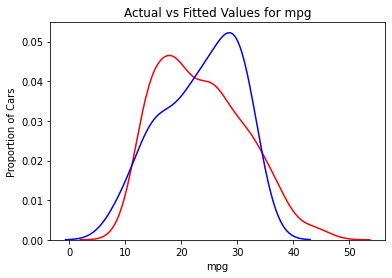

In [47]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## ***Decision Tree*** 

In [48]:
dtree=DecisionTreeRegressor(random_state=0,criterion="squared_error",splitter='best')
dtree2=DecisionTreeRegressor(random_state=0)

dtree2.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
y_pred2=dtree2.predict(x_test)
y_pred2

array([13. , 26.5, 14. , 19. , 18. , 31. , 29.8, 21. , 18. , 24.2, 34.3,
       39. , 15. , 24.5, 15.5, 32. , 27. , 26.6, 16.5, 46.6, 16. , 23. ,
       24. , 19. , 34.2, 24.2, 44.6, 31. , 32. , 16. , 19.2, 35. , 15. ,
       32. , 19.1, 25. , 19.4, 16. , 33. , 12. , 14. , 14. , 28.4, 34.3,
       29.8, 20. , 19.4, 11. , 21. , 31. , 33.7, 25. , 13. , 28. , 14. ,
       11. , 18. , 30.7, 32. , 18. ])

In [50]:
import os
path = "D:/VIT Chennai/Fall Semester 22-23/ML/proj"
#os.environ[path] = os.environ[path]+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

cn = ['cylinders', 'displacement','horsepower','weight','acceleration','model year','origin']
export_graphviz(dtree2, out_file=dot_data,
                class_names =  cn, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [88]:
print("R2 Score :" ,r2_score(y_test,y_pred2))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred2)))

ValueError: ignored

In [ ]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

***Decision Tree with categorical labels*** 

In [ ]:
y_train.std()

y_train

***Converting MPG Numerical data into Ranges***

In [ ]:

bin_ranges = [0,4,8,12,16,20,24,28,32,36,40,44,48,52]
bin_names = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13]

df2 = df.copy()

df2['mpg_bin_custom_range'] = pd.cut( np.array(
                                              df2['mpg']), 
                                              bins=bin_ranges)

df2['mpg_bin_custom_label'] = pd.cut(np.array(
                                              df2['mpg']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)
# view the binned features 
df2[['mpg','mpg_bin_custom_range', 
               'mpg_bin_custom_label']].iloc[10:50]

df2

In [ ]:
X2=df2.iloc[:,1:8]
X2.head()
y2=df2['mpg_bin_custom_label']
y2.head()

x_train2,x_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.15,random_state=0)

In [ ]:
dtree=DecisionTreeRegressor(random_state=0,criterion="squared_error",splitter='best')

dtree2.fit(x_train2,y_train2)

y_pred2_1=dtree2.predict(x_test2)
y_pred2_1

In [ ]:
import os
path = "D:/VIT Chennai/Fall Semester 22-23/ML/proj"
#os.environ[path] = os.environ[path]+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

cn = ['cylinders', 'displacement','horsepower','weight','acceleration','model year','origin']

export_graphviz(dtree2, out_file=dot_data,
                class_names =  cn, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
print("R2 Score :" ,r2_score(y_test2,y_pred2))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred2)))

In [ ]:
ax1 = sns.distplot(df2['mpg_bin_custom_label'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
X=df.iloc[:,1:8]
X.head()
y=df['mpg']
y.head()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

## ***KNN***

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 110)
knn.fit(x_train, y_train)


In [ ]:

y_pred3=knn.predict(x_test)
y_pred3

In [ ]:
print("R2 Score :" ,r2_score(y_test,y_pred3))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred3)))

In [ ]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## ***Random forest***

In [ ]:
rf= RandomForestRegressor(n_estimators=10,random_state=0,criterion='squared_error')
rf.fit(x_train,y_train)

In [ ]:
y_pred4=rf.predict(x_test)
y_pred4

In [ ]:
print("R2 Score :" ,r2_score(y_test,y_pred4))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred4)))

In [ ]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
X=df.iloc[:,1:8]
X.head()
y=df['mpg']
y.head()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

## **XGBoost**

In [ ]:
xgb= xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 123)
xgb.fit(x_train,y_train)

In [ ]:
y_pred5=xgb.predict(x_test)
y_pred5

In [ ]:
print("R2 Score :" ,r2_score(y_test,y_pred5))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred5)))

In [ ]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## ***Ridge Regression Model***

In [ ]:
ridge = Ridge(alpha=.01)
ridge.fit(x_train,y_train)  

In [ ]:
y_pred6 = ridge.predict(x_test) 
y_pred6

In [ ]:
print("R2 Score :" ,r2_score(y_test,y_pred6))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred6)))

In [ ]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred6, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## ***Lasso Model***

In [ ]:
lasso = Lasso()
#param['max_iter'] = [1000,10000,100000,1000000]
#lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) # initialize the grid search
lasso.fit(x_train,y_train)

In [ ]:
y_pred7 = lasso.predict(x_test) 
y_pred7

In [ ]:
print("R2 Score :" ,r2_score(y_test,y_pred7))
print("Mean Square Error  :" ,np.sqrt(mean_squared_error(y_test,y_pred7)))

In [ ]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred7, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
Acc=[r2_score(y_test,y_pred1),r2_score(y_test,y_pred2),r2_score(y_test,y_pred3),r2_score(y_test,y_pred4),r2_score(y_test,y_pred5),r2_score(y_test,y_pred6),r2_score(y_test,y_pred7)]

Name=["Linear Regression","Decision Tree","KNN","Random Forest","XGBoost","Ridge Regression","Lasso Model"]

indices = [i for i in range(len(Acc)) if Acc[i] == max(Acc)]

print("Accuracy Score","        "," ALgorithm","\n")

for i in indices:
  print(max(Acc),"--->",Name[i])

#K Fold Algorithm



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
cross_val_score(rf, X, y, cv=cv)


#custom_cv = custom_cv_2folds(X)
#cross_val_score(rf, X, y, cv=custom_cv)


In [84]:
import numpy as np
from sklearn.model_selection import KFold

#X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46 

***Random Permutation***

In [85]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[254 246 282  81 347 392 271  96  89 179  21 175 214 303  49 236 352  92
 221 322 230 357 140  22 250 155 356 216 186 281  66 238 164 101 310 394
 324  17 233 225  30 114 150 103 348 362 158 116 328 120 393 112 229 136
 274 126 308 298 280 133  33 376 162  34 388  97  85  61 167 191 198 389
 232 218 108  46 319 190 332  73 137 379 253 386  29 181 287 284  51 326
 350  27   2 215 156 210 374 219 138 234 217 340 387 306 339  35 204 264
  67  24 381  44 239 129  93 111 166 276 313 272  40  18 283  79 247 249
  71  13 336 213 383 240 228 160 104 161  83 189 395 118 255 188 208 373
 110 149 157 152  16 268  75 109 325 205 278 252 139 237 318 248 307  19
 226 311   3 275 125  77 184 300 377 344 182 354  80 258  11 297  86 266
  36 380  58  41 270  50 209 316 315 329 123 222  62 301 130 187  23  43
   0 201 375  98 385 178 256  94 367  95 349 169  69 305  48 207 279 227
 148 143 180 131 355 396 262 203  84 121 343 364  91  82 267 119 291  57
 321 257 353  42 105 366 273 351  38  53 345 128 29

In [86]:
train_sizes = np.arange(start=0.1, stop=1, step=0.1)

X=df.iloc[:,1:8]
y=df['mpg']

allAlgos = [lr,dtree,knn,rf,xgb,ridge,lasso]

folds = []
#allPreds = [ y_pred1,y_pred2 ,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7]

for i in train_sizes:
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=0)
  ithFold = []
  for x in range(0,7):
    if(x==2):
      allAlgos[x] = KNeighborsRegressor(n_neighbors = int((25*x_train.shape[0])/100))
    allAlgos[x].fit(x_train,y_train)
    ypred = allAlgos[x].predict(x_test)
    acrcy = r2_score(y_test,ypred)
    ithFold.append(acrcy)
  folds.append(ithFold)




[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [87]:
kfold_matrix = pd.DataFrame(folds)
sizes = ["10%","20%","30%","40%","50%","60%","70%","80%","90%"]
models = ['linearReg','Dtree','KNN','RandomForest','XGB','RidgeReg','LassoReg']


kfold_matrix.index = sizes
kfold_matrix.columns = models

kfold_matrix

,linearReg,Dtree,KNN,RandomForest,XGB,RidgeReg,LassoReg
10%,0.844021,0.821429,0.775148,0.925175,0.896647,0.844022,0.845066
20%,0.818840,0.863060,0.765200,0.884362,0.871625,0.818841,0.823083
30%,0.816649,0.803957,0.727617,0.874296,0.874082,0.816649,0.807917
40%,0.806366,0.773747,0.704248,0.865565,0.871886,0.806365,0.789685
50%,0.809938,0.758224,0.706911,0.862220,0.872877,0.809938,0.795110
60%,0.803902,0.715298,0.694670,0.832892,0.844831,0.803901,0.789138
70%,0.802824,0.638236,0.688456,0.827557,0.829845,0.802823,0.785937
80%,0.799398,0.724222,0.685345,0.833843,0.815296,0.799407,0.794889
90%,0.792361,0.725957,0.642379,0.759723,0.789021,0.792397,0.787234
